In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# For Chinese font
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="NotoSansCJKtc-Regular.otf", size=10)
# Load data
data11 = pd.read_csv('apts_68station.csv')

   241 121
0       47
1       37
2       32
3       33
4       37
1
200702220000.txt


In [2]:
allrh700 = pd.read_csv('aaa.csv')
print(allrh700.shape)
allrh700.head()

(3651, 673)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,662,663,664,665,666,667,668,669,670,671
0,0,45.0,46.0,51.0,56.0,59.0,61.0,64.0,66.0,70.0,...,50.0,53.0,55.0,56.0,55.0,52.0,50.0,51.0,54.0,59.0
1,1,60.0,65.0,69.0,68.0,66.0,60.0,56.0,51.0,45.0,...,68.0,44.0,25.0,16.0,14.0,15.0,14.0,12.0,10.0,10.0
2,2,21.0,26.0,32.0,36.0,39.0,38.0,36.0,31.0,25.0,...,97.0,96.0,96.0,96.0,95.0,94.0,92.0,91.0,92.0,93.0
3,3,19.0,20.0,22.0,24.0,26.0,26.0,31.0,33.0,33.0,...,98.0,98.0,98.0,98.0,99.0,98.0,98.0,98.0,98.0,99.0
4,4,15.0,12.0,9.0,8.0,9.0,9.0,9.0,9.0,10.0,...,70.0,71.0,76.0,80.0,82.0,81.0,78.0,76.0,74.0,73.0


(3651, 672)
[0.34668389 0.54616108 0.632456   0.70582059 0.75238471 0.78181861
 0.80160594 0.82060529 0.83514748 0.84889475 0.85848878 0.86757032
 0.87533574 0.88294091 0.88885952 0.89450585 0.89954034 0.90417665
 0.90842696 0.9122623 ]


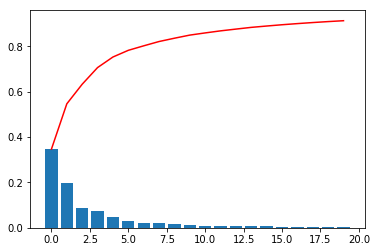

In [3]:
from sklearn.decomposition import PCA
forpca= allrh700.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=20)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
proj = pca.transform(forpca)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA
print(np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(20),pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.show()

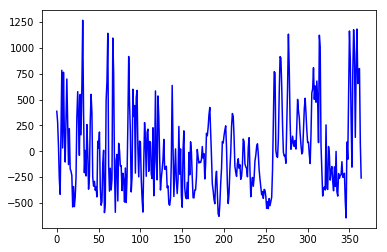

In [35]:
plt.plot(proj[:365,0], 'b-')
plt.show()

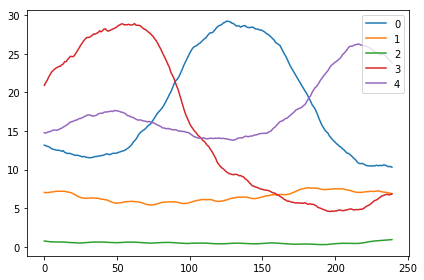

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import linear_model
ncluster = 5

hc = AgglomerativeClustering(n_clusters=ncluster, affinity='euclidean', linkage='ward')  
hc.fit_predict(data11.T) 

#print(hc.labels_)

for i in range(ncluster):
    plt.plot(data11.iloc[:,hc.labels_==i].mean(axis=1),label=i)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
Y = (hc.labels_== 0)*1

Y = np.array(Y).reshape(len(Y),1)
#print(Y)
pc=0
#apts = pd.read_csv('apts_68station.csv')
akk=np.empty((3642,10))
akk[:,0] = proj[0:3642,pc]
akk[:,1] = proj[1:3643,pc]
akk[:,2] = proj[2:3644,pc]
akk[:,3] = proj[3:3645,pc]
akk[:,4] = proj[4:3646,pc]
akk[:,5] = proj[5:3647,pc]
akk[:,6] = proj[6:3648,pc]
akk[:,7] = proj[7:3649,pc]
akk[:,8] = proj[8:3650,pc]
akk[:,9] = proj[9:3651,pc]

aaa=pd.DataFrame(akk)
#print(aaa)
# Prepare data
Xts = akk
print('Dimension of X: '+ str(Xts.shape))
print('Dimension of Y: '+ str(Y.shape))

#
# Fit the classifier
mvreg = linear_model.LogisticRegression(C=1e6, solver='lbfgs', max_iter=500)
mvreg.fit(Xts, Y.flatten())

# Show the results
yhat_mv = mvreg.predict(Xts)

#print((mvreg.coef_, mvreg.intercept_))

# Show confusion matrix
ctl = pd.DataFrame({'y':Y.flatten(), 'yhat':yhat_mv.flatten()})
#print(ctl)
print('=== Confusion Matrix ===')
print(pd.crosstab(ctl['y'], ctl['yhat']))
from sklearn.metrics import accuracy_score, classification_report
cr = classification_report(ctl['y'], ctl['yhat'])
print(cr)

Dimension of X: (3642, 10)
Dimension of Y: (3642, 1)
=== Confusion Matrix ===
yhat     0  1
y            
0     3382  1
1      257  2
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3383
           1       0.67      0.01      0.02       259

   micro avg       0.93      0.93      0.93      3642
   macro avg       0.80      0.50      0.49      3642
weighted avg       0.91      0.93      0.90      3642



In [8]:
import statsmodels.api as sm
mvlogit = sm.Logit(Y.flatten(), sm.add_constant(Xts))
mvlogit.fit(method='lbfgs', maxiter=500).summary()

D:\program\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3642
Model:                          Logit   Df Residuals:                     3611
Method:                           MLE   Df Model:                           30
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  -1.702
Time:                        10:47:30   Log-Likelihood:                -2524.4
converged:                       True   LL-Null:                       -934.22
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.033          0      1.000      -0.065       0.065
x1                  0      0.000          0      1.000      -0.000       0.000
x2                  0      0.000          0      1.000      -0.000       0.000
x3                  0      0.000          0      1.000      -0.000       0.000
x4                  0      0.000          0      1.000      -0.000       0.000
x5                  0      0.000          0      1.000      -0.000       0.000
x6                  0      0.000          0      1.000      -0.000       0.000
x7                  0      0.000          0      1.000      -0.000       0.000
x8                  0      0.000          0      1.000      -0.000       0.000
x9                  0      0.000          0      1.000      -0.000       0.000
x10                 0      0.000          0      1.000      -0.000       0.000
x11                 0      0.000          0      1.000      -0.000       0.000
x12                 0      0.000          0      1.000      -0.000       0.000
x13                 0      0.000          0      1.000      -0.000       0.000
x14                 0      0.000          0      1.000      -0.000       0.000
x15                 0      0.000          0      1.000      -0.000       0.000
x16                 0      0.000          0      1.000      -0.000       0.000
x17                 0      0.000          0      1.000      -0.000       0.000
x18                 0      0.000          0      1.000      -0.000       0.000
x19                 0      0.000          0      1.000      -0.000       0.000
x20                 0      0.000          0      1.000      -0.000       0.000
x21                 0      0.000          0      1.000      -0.000       0.000
x22                 0      0.000          0      1.000      -0.000       0.000
x23                 0      0.000          0      1.000      -0.000       0.000
x24                 0      0.000          0      1.000      -0.000       0.000
x25                 0      0.000          0      1.000      -0.000       0.000
x26                 0      0.000          0      1.000      -0.000       0.000
x27                 0      0.000          0      1.000      -0.000       0.000
x28                 0      0.000          0      1.000      -0.000       0.000
x29                 0      0.000          0      1.000      -0.000       0.000
x30                 0      0.000          0      1.000      -0.000       0.000
==============================================================================
"""

In [11]:

#print(Y)
apts = pd.read_csv('apts_68station.csv')


# Prepare data
#Xts = apts.T
Xts = np.array(forpca.iloc[0:3642,:])
print('Dimension of X: '+ str(Xts.shape))
print('Dimension of Y: '+ str(Y.shape))
#
# Fit the classifier
mvreg = linear_model.LogisticRegression(C=1e6, solver='lbfgs', max_iter=500)
mvreg.fit(Xts, Y.flatten())
# Show the results
yhat_mv = mvreg.predict(Xts)
#print((mvreg.coef_, mvreg.intercept_))

# Show confusion matrix
ctl = pd.DataFrame({'y':Y.flatten(), 'yhat':yhat_mv.flatten()})
print('=== Confusion Matrix ===')
print(pd.crosstab(ctl['y'], ctl['yhat']))

Dimension of X: (3642, 672)
Dimension of Y: (3642, 1)
=== Confusion Matrix ===
yhat     0    1
y              
0     3359   24
1      157  102


D:\program\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [80]:
# 
import statsmodels.api as sm
mvlogit = sm.Logit(Y.flatten(), sm.add_constant(Xts))
mvlogit.fit(method='lbfgs', maxiter=500).summary()

D:\program\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3642
Model:                          Logit   Df Residuals:                     2969
Method:                           MLE   Df Model:                          672
Date:                Thu, 02 May 2019   Pseudo R-squ.:                  -1.702
Time:                        17:18:08   Log-Likelihood:                -2524.4
converged:                       True   LL-Null:                       -934.22
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.222          0      1.000      -0.435       0.435
x1                  0      0.023          0      1.000      -0.046       0.046
x2                  0      0.040          0      1.000      -0.079       0.079
x3                  0      0.046          0      1.000      -0.089       0.089
x4                  0      0.048          0      1.000      -0.093       0.093
x5                  0      0.047          0      1.000      -0.091       0.091
x6                  0      0.044          0      1.000      -0.087       0.087
x7                  0      0.041          0      1.000      -0.081       0.081
x8                  0      0.038          0      1.000      -0.074       0.074
x9                  0      0.029          0      1.000      -0.058       0.058
x10                 0      0.023          0      1.000      -0.045       0.045
x11                 0      0.021          0      1.000      -0.041       0.041
x12                 0      0.019          0      1.000      -0.038       0.038
x13                 0      0.011          0      1.000      -0.022       0.022
x14                 0      0.006          0      1.000      -0.012       0.012
x15                 0      0.011          0      1.000      -0.021       0.021
x16                 0      0.012          0      1.000      -0.023       0.023
x17                 0      0.017          0      1.000      -0.033       0.033
x18                 0      0.022          0      1.000      -0.043       0.043
x19                 0      0.026          0      1.000      -0.051       0.051
x20                 0      0.029          0      1.000      -0.057       0.057
x21                 0      0.032          0      1.000      -0.063       0.063
x22                 0      0.035          0      1.000      -0.068       0.068
x23                 0      0.035          0      1.000      -0.070       0.070
x24                 0      0.034          0      1.000      -0.066       0.066
x25                 0      0.032          0      1.000      -0.062       0.062
x26                 0      0.033          0      1.000      -0.065       0.065
x27                 0      0.029          0      1.000      -0.057       0.057
x28                 0      0.016          0      1.000      -0.032       0.032
x29                 0      0.035          0      1.000      -0.069       0.069
x30                 0      0.050          0      1.000      -0.098       0.098
x31                 0      0.054          0      1.000      -0.106       0.106
x32                 0      0.051          0      1.000      -0.101       0.101
x33                 0      0.053          0      1.000      -0.103       0.103
x34                 0      0.053          0      1.000      -0.105       0.105
x35                 0      0.051          0      1.000      -0.101       0.101
x36                 0      0.051          0      1.000      -0.099       0.099
x37                 0      0.048          0      1.000      -0.094       0.094
x3

In [15]:
Y = (hc.labels_== 0)*1

Y = np.array(Y).reshape(len(Y),1)
#print(Y)
pc=0
#apts = pd.read_csv('apts_68station.csv')
akk=np.empty((3642,30))
akk[:,0] = proj[0:3642,pc]
akk[:,1] = proj[1:3643,pc]
akk[:,2] = proj[2:3644,pc]
akk[:,3] = proj[3:3645,pc]
akk[:,4] = proj[4:3646,pc]
akk[:,5] = proj[5:3647,pc]
akk[:,6] = proj[6:3648,pc]
akk[:,7] = proj[7:3649,pc]
akk[:,8] = proj[8:3650,pc]
akk[:,9] = proj[9:3651,pc]
pc=1
akk[:,10] = proj[0:3642,pc]
akk[:,11] = proj[1:3643,pc]
akk[:,12] = proj[2:3644,pc]
akk[:,13] = proj[3:3645,pc]
akk[:,14] = proj[4:3646,pc]
akk[:,15] = proj[5:3647,pc]
akk[:,16] = proj[6:3648,pc]
akk[:,17] = proj[7:3649,pc]
akk[:,18] = proj[8:3650,pc]
akk[:,19] = proj[9:3651,pc]
pc=2
akk[:,20] = proj[0:3642,pc]
akk[:,21] = proj[1:3643,pc]
akk[:,22] = proj[2:3644,pc]
akk[:,23] = proj[3:3645,pc]
akk[:,24] = proj[4:3646,pc]
akk[:,25] = proj[5:3647,pc]
akk[:,26] = proj[6:3648,pc]
akk[:,27] = proj[7:3649,pc]
akk[:,28] = proj[8:3650,pc]
akk[:,29] = proj[9:3651,pc]


# Prepare data
Xts = akk
print('Dimension of X: '+ str(Xts.shape))
print('Dimension of Y: '+ str(Y.shape))

#
# Fit the classifier
mvreg = linear_model.LogisticRegression(C=1e6, solver='lbfgs', max_iter=500)
mvreg.fit(Xts, Y.flatten())

# Show the results
yhat_mv = mvreg.predict(Xts)

#print((mvreg.coef_, mvreg.intercept_))

# Show confusion matrix
ctl = pd.DataFrame({'y':Y.flatten(), 'yhat':yhat_mv.flatten()})
#print(ctl)
print('=== Confusion Matrix ===')
print(pd.crosstab(ctl['y'], ctl['yhat']))
from sklearn.metrics import accuracy_score, classification_report
cr = classification_report(ctl['y'], ctl['yhat'])
print(cr)

Dimension of X: (3642, 30)
Dimension of Y: (3642, 1)
=== Confusion Matrix ===
yhat     0  1
y            
0     3379  4
1      256  3
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3383
           1       0.43      0.01      0.02       259

   micro avg       0.93      0.93      0.93      3642
   macro avg       0.68      0.51      0.49      3642
weighted avg       0.89      0.93      0.90      3642



(3651, 673)
(3651, 672)
[0.86348746 0.94364585 0.96940854 0.97699259 0.98273074 0.98664148
 0.98883104 0.99035654 0.99163792 0.99262167 0.99344521 0.99402947
 0.99454311 0.99500535 0.99545187 0.99578961 0.99605808 0.99629535
 0.99651323 0.99672123]


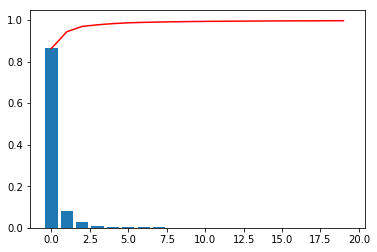

In [16]:
allh500 = pd.read_csv('ah500.csv')
print(allh500.shape)
allh500.head()
from sklearn.decomposition import PCA
forpca= allh500.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=20)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
hproj = pca.transform(forpca)                                  # Derive the time series of 10 PCs
# See prelimirary results of PCA
print(np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(20),pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.show()

In [22]:
#print(Y)
pc=0
#apts = pd.read_csv('apts_68station.csv')
hakk=np.empty((3642,10))
hakk[:,0] = hproj[0:3642,pc]
hakk[:,1] = hproj[1:3643,pc]
hakk[:,2] = hproj[2:3644,pc]
hakk[:,3] = hproj[3:3645,pc]
hakk[:,4] = hproj[4:3646,pc]
hakk[:,5] = hproj[5:3647,pc]
hakk[:,6] = hproj[6:3648,pc]
hakk[:,7] = hproj[7:3649,pc]
hakk[:,8] = hproj[8:3650,pc]
hakk[:,9] = hproj[9:3651,pc]



#print(aaa)
# Prepare data
Xts = hakk
print('Dimension of X: '+ str(Xts.shape))
print('Dimension of Y: '+ str(Y.shape))

#
# Fit the classifier
mvreg = linear_model.LogisticRegression(C=1e6, solver='lbfgs', max_iter=500)
mvreg.fit(Xts, Y.flatten())

# Show the results
yhat_mv = mvreg.predict(Xts)

#print((mvreg.coef_, mvreg.intercept_))

# Show confusion matrix
ctl = pd.DataFrame({'y':Y.flatten(), 'yhat':yhat_mv.flatten()})
#print(ctl)
print('=== Confusion Matrix ===')
print(pd.crosstab(ctl['y'], ctl['yhat']))
from sklearn.metrics import accuracy_score, classification_report
cr = classification_report(ctl['y'], ctl['yhat'])
print(cr)

Dimension of X: (3642, 10)
Dimension of Y: (3642, 1)
=== Confusion Matrix ===
yhat     0
y         
0     3383
1      259
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3383
           1       0.00      0.00      0.00       259

   micro avg       0.93      0.93      0.93      3642
   macro avg       0.46      0.50      0.48      3642
weighted avg       0.86      0.93      0.89      3642



D:\program\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\program\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\program\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#print(Y)
pc=0
#apts = pd.read_csv('apts_68station.csv')
hakk=np.empty((3642,20))
hakk[:,0] = hproj[0:3642,pc]
hakk[:,1] = hproj[1:3643,pc]
hakk[:,2] = hproj[2:3644,pc]
hakk[:,3] = hproj[3:3645,pc]
hakk[:,4] = hproj[4:3646,pc]
hakk[:,5] = hproj[5:3647,pc]
hakk[:,6] = hproj[6:3648,pc]
hakk[:,7] = hproj[7:3649,pc]
hakk[:,8] = hproj[8:3650,pc]
hakk[:,9] = hproj[9:3651,pc]

hakk[:,10] = proj[0:3642,pc]
hakk[:,11] = proj[1:3643,pc]
hakk[:,12] = proj[2:3644,pc]
hakk[:,13] = proj[3:3645,pc]
hakk[:,14] = proj[4:3646,pc]
hakk[:,15] = proj[5:3647,pc]
hakk[:,16] = proj[6:3648,pc]
hakk[:,17] = proj[7:3649,pc]
hakk[:,18] = proj[8:3650,pc]
hakk[:,19] = proj[9:3651,pc]

#print(aaa)
# Prepare data
Xts = hakk
print('Dimension of X: '+ str(Xts.shape))
print('Dimension of Y: '+ str(Y.shape))

#
# Fit the classifier
mvreg = linear_model.LogisticRegression(C=1e6, solver='lbfgs', max_iter=500)
mvreg.fit(Xts, Y.flatten())

# Show the results
yhat_mv = mvreg.predict(Xts)

#print((mvreg.coef_, mvreg.intercept_))

# Show confusion matrix
ctl = pd.DataFrame({'y':Y.flatten(), 'yhat':yhat_mv.flatten()})
#print(ctl)
print('=== Confusion Matrix ===')
print(pd.crosstab(ctl['y'], ctl['yhat']))
from sklearn.metrics import accuracy_score, classification_report
cr = classification_report(ctl['y'], ctl['yhat'])
print(cr)

Dimension of X: (3642, 20)
Dimension of Y: (3642, 1)
=== Confusion Matrix ===
yhat     0  1
y            
0     3375  8
1      252  7
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3383
           1       0.47      0.03      0.05       259

   micro avg       0.93      0.93      0.93      3642
   macro avg       0.70      0.51      0.51      3642
weighted avg       0.90      0.93      0.90      3642



In [20]:
Xts = np.array(forpca.iloc[0:3642,:])
print('Dimension of X: '+ str(Xts.shape))
print('Dimension of Y: '+ str(Y.shape))
#
# Fit the classifier
mvreg = linear_model.LogisticRegression(C=1e6, solver='lbfgs', max_iter=500)
mvreg.fit(Xts, Y.flatten())
# Show the results
yhat_mv = mvreg.predict(Xts)
#print((mvreg.coef_, mvreg.intercept_))

# Show confusion matrix
ctl = pd.DataFrame({'y':Y.flatten(), 'yhat':yhat_mv.flatten()})
print('=== Confusion Matrix ===')
print(pd.crosstab(ctl['y'], ctl['yhat']))

Dimension of X: (3642, 672)
Dimension of Y: (3642, 1)
=== Confusion Matrix ===
yhat     0  1
y            
0     3382  1
1      257  2


D:\program\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
